### import statements

In [1]:
import numpy as np 
import sympy as sp 
from scipy import integrate
import matplotlib.pyplot as plt

### problem 1

angle of attack

In [23]:
m = 6.2 # kg
v_inf = 10 # m/s
c = 0.438 # m
b = 2 # m
rho = 1.225 # kg/m^3
g = 9.81 # m/s^2

L_prime = (g * m) / b
C_l = L_prime / (0.5 * rho * v_inf**2 * c)

A = 0
B = np.arccos(0.2)
C = np.pi

func1 = lambda theta: 0.125 * (0.8 - (1 - np.cos(theta))) * (1 - np.cos(theta))
func2 = lambda theta: 0.05555 * (0.8 - (1 - np.cos(theta))) * (1 - np.cos(theta))

alpha_rad = (C_l / (2 * np.pi)) + (1 / np.pi) * (integrate.quad(func1, A, B)[0] + integrate.quad(func2, B, C)[0])
alpha_deg = np.rad2deg(alpha_rad)

print("angle of attack in radians: ", alpha_rad)
print("angle of attack in deg: ", alpha_deg)

angle of attack in radians:  0.1441635788186978
angle of attack in deg:  8.259964625812973


induced drag coefficient

In [24]:
C_di = C_l**2 / (np.pi * (b / c))

print("coefficient of induced drag: ", C_di)

coefficient of induced drag:  0.0895767368111043


### problem 2: elliptical

In [45]:
func3 = lambda theta: 0.125 * (0.8 - (1 - np.cos(theta))) * np.cos(theta)
func4 = lambda theta: 0.05555 * (0.8 - (1 - np.cos(theta))) * np.cos(theta)

A1 = (2 / np.pi) * (integrate.quad(func3, A, B)[0] + integrate.quad(func4, B, C)[0])
alpha_L0 = np.deg2rad(-2.077) # need value

c_ellip = np.pi * b * A1 / C_l

AR_ellip = b / c_ellip
alpha_induced_ellip = C_l / (np.pi * AR_ellip)

alpha_ellip = (C_l / (2 * np.pi)) - (-alpha_induced_ellip - alpha_L0)
C_di_ellip = C_l**2 / (np.pi * AR_ellip)

print("induced alpha: ", np.rad2deg(alpha_induced_ellip))
print("alpha ellip: ", np.rad2deg(alpha_ellip))
print("induced drag coefficient ellip: ", C_di_ellip)

induced alpha:  4.669128252968121
alpha ellip:  12.92909839246088
induced drag coefficient ellip:  0.09237696054883009


### Problem 3: tapered

In [26]:
planform_area = b * c
a_tapered = 0.63
b_tapered = 0.246
lamb = b_tapered / a_tapered
AR_tapered = b / ((a_tapered + b_tapered) / 2)

# change these when they finish part 1
delta = 0.03 # graph
a0 = 0.1097 # slope of lift from part 1
tau = 0.065 # graph

# continue workflow
A_tape = a0 / ((1 + (a0 / np.pi * AR_tapered)) * (1 + tau))

alpha_tapered = (C_l / A_tape) + alpha_L0

C_di_tapered = (C_l**2 / (np.pi * AR_tapered)) * (1 + delta)

print("Angle of attack tapered: ", alpha_tapered)
print("coefficient of induced drag: ", C_di_tapered)

Angle of attack tapered:  12.723549550913027
coefficient of induced drag:  0.09226403891543743


### Problem 4: rectangular

In [39]:
e_rect = 1 / (1 + 0.01)
AR_rect = b / c 

#C_l_rect = A1 * np.pi * AR_rect
C_di_rect = C_l**2 / (np.pi * AR_rect * e_rect)

alpha_induced_rect = C_l / (np.pi / AR_rect)

alpha = sp.symbols('alpha')
eq1 = sp.Eq(2 * np.pi * (alpha - alpha_induced_rect - np.deg2rad(alpha_L0)), C_l)
alpha_rect = sp.solve(eq1, alpha)[0]

print("angle of attack rectangle: ", alpha_rect)
print("induced drag coeff rect: ", C_di_rect)

angle of attack rectangle:  1.82739940578597
induced drag coeff rect:  0.09047250417921535


### CL vs. Alpha Plots for Elliptical, Tapered, Rectangular Wings

##### functions

In [40]:
def getCLEllip(alpha):
  cl = sp.symbols('cl')
  c = np.pi * b * A1 / cl
  AR = b / c
  alpha_i = cl / (np.pi * AR)
  eq_ellip = sp.Eq(2 * np.pi * (np.deg2rad(alpha) - alpha_i - np.deg2rad(alpha_L0)), cl)
  C_l_ellip = sp.solve(eq_ellip, cl)[0]
  return C_l_ellip  

def getCLTapered(alpha):
  CL = (alpha - alpha_L0) * A_tape
  return CL

def getCLRect(alpha):
  CL = (2 * np.pi * (np.deg2rad(alpha) - np.deg2rad(alpha_L0))) / (1 + (2 / AR_rect))
  return CL


##### data

In [41]:
alpha_values = np.linspace(-7.5, 12.5, 500)
CLEllip_values = np.array([getCLEllip(CL) for CL in alpha_values])
CLTapered_values = np.array([getCLTapered(CL) for CL in alpha_values])
CLRect_values = np.array([getCLRect(CL) for CL in alpha_values])

##### elliptical

<function matplotlib.pyplot.show(close=None, block=None)>

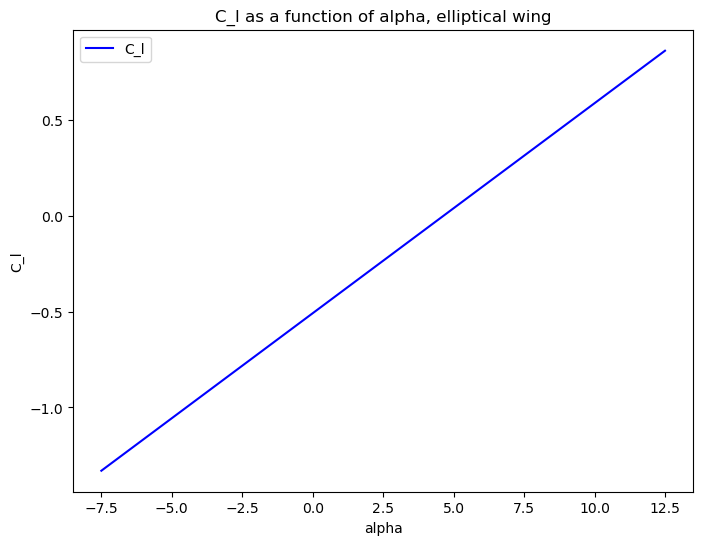

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, CLEllip_values, 'b-', label='C_l')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("C_l")
plt.title("C_l as a function of alpha, elliptical wing")

plt.show

##### tapered

<function matplotlib.pyplot.show(close=None, block=None)>

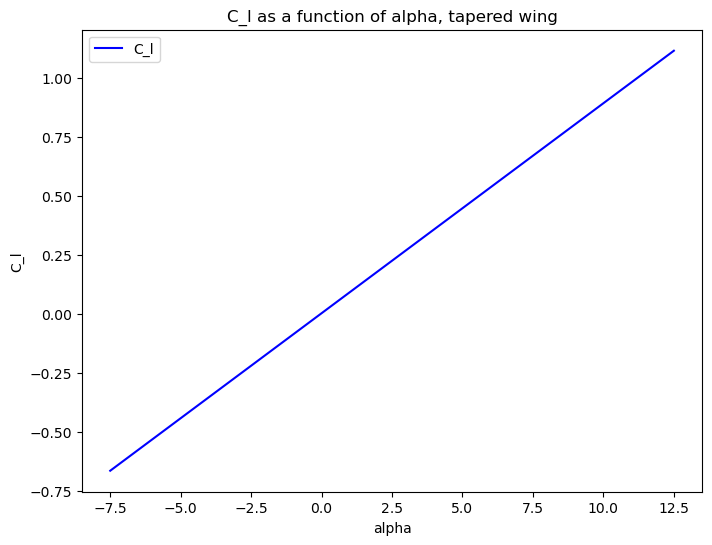

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, CLTapered_values, 'b-', label='C_l')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("C_l")
plt.title("C_l as a function of alpha, tapered wing")

plt.show

##### rectangular

<function matplotlib.pyplot.show(close=None, block=None)>

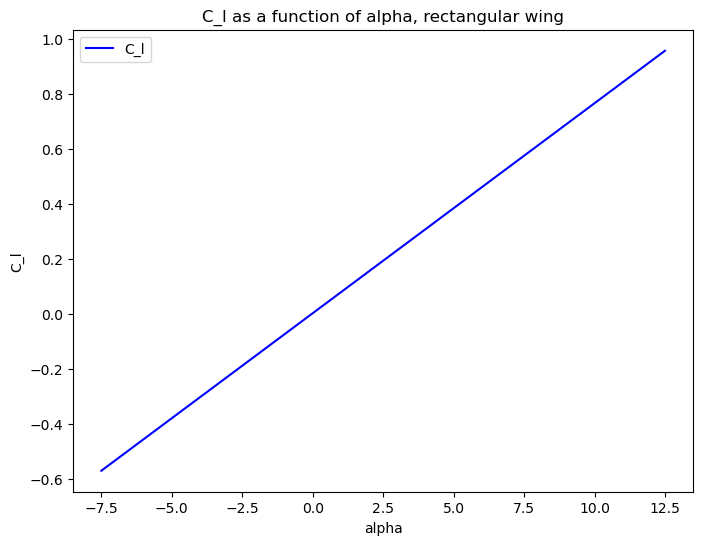

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, CLRect_values, 'b-', label='C_l')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("C_l")
plt.title("C_l as a function of alpha, rectangular wing")

plt.show